In [ ]:
# 多椀バンディット問題の環境の実装
# 入力は0から9の整数でアームを選択し、
# 出力は0または1の報酬
# 状態のない強化学習
import numpy as np
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0


In [ ]:
# シミュレーションの実行
bandit = Bandit()
for i in range(3):
    print(bandit.play(0)) # 0番目のアームを選択

1
1
1


In [ ]:
# 行動価値の実装
bandit = Bandit()
Q = 0

for n in range(1, 11):
    reward = bandit.play(0) # 0番目のアームを選択
    Q += (reward - Q) / n # 行動価値Qの更新
    print(Q)

1.0
1.0
0.6666666666666667
0.75
0.8
0.8333333333333334
0.8571428571428572
0.875
0.8888888888888888
0.8999999999999999


In [5]:
# 行動価値配列の実装
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10) # ランダムにアームを選択
    reward = bandit.play(action) # 選択したアームをプレイ

    ns[action] += 1 # 選択したアームの回数を更新
    Qs[action] += (reward - Qs[action]) / ns[action] # 行動価値Qの更新
    print(Qs)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
[0.  0.  0.  0.  0.  1.  0.  1.  0.  0.5]
[0.  0.  0.  0.  1.  1.  0.  1.  0.  0.5]
[0.  0.  0.  0.  1.  1.  0.  1.  0.  0.5]
[0.  0.  0.  0.  1.  1.  0.  1.  0.  0.5]
[0.  0.  0.  0.  1.  1.  1.  1.  0.  0.5]


In [ ]:
# epsilon-greedy法を用いたエージェントの実装
# ★標本平均
class Agent:
    def __init__(self, epsilon, action_size = 10):
        self.epsilon = epsilon
        self.ns = np.zeros(action_size)
        self.Qs = np.zeros(action_size)

    # 行動価値の更新(0から9の整数でアクションを選択)
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    # 0から9の整数でアクションの選択
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

820


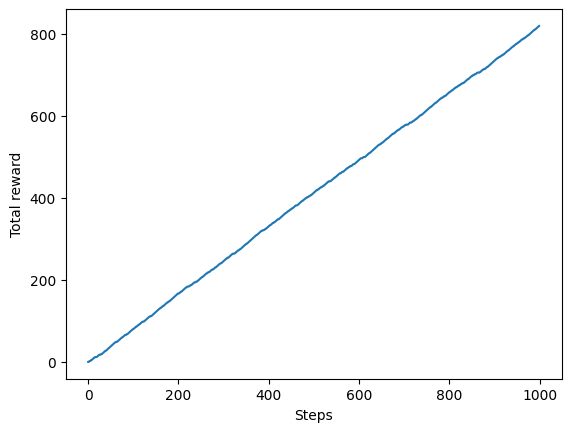

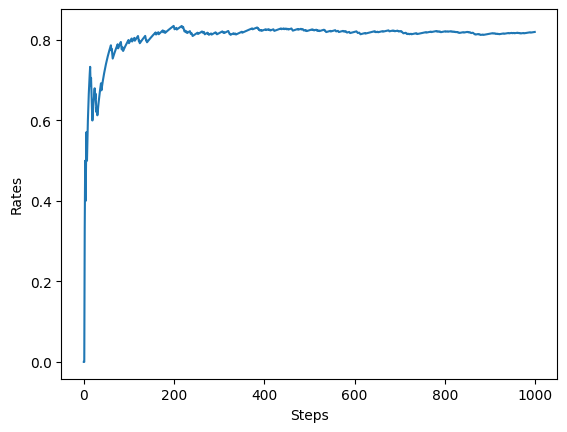

In [11]:
# BanditとAgentを組み合わせたシミュレーション
import matplotlib.pyplot as plt

steps = 1000
epsolon = 0.1


bandit = Bandit()
agent = Agent(epsolon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action() # エージェントがアームを選択
    reward = bandit.play(action) # 選択したアームをプレイ
    agent.update(action, reward) # エージェントの行動価値を更新

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1)) # 平均報酬を計算

print(total_reward)

# グラフの描画
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()


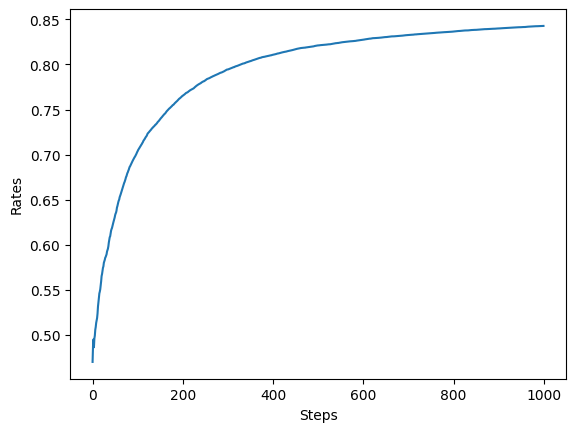

In [8]:
# 複数のシミュレーションの平均をとる

runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000)の配列

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action() # エージェントがアームを選択
        reward = bandit.play(action) # 選択したアームをプレイ
        agent.update(action, reward) # エージェントの行動価値を更新

        total_reward += reward
        rates.append(total_reward / (step + 1))
    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0) # 各ステップの平均を計算
# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

In [9]:
# 非定常なバンディット問題の環境の実装
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # ノイズの追加
        if rate > np.random.rand():
            return 1
        else:
            return 0


In [ ]:
# 非定常なバンディット問題のエージェント
# 固定値のalphaを用いて行動価値を更新することで、過去の行動価値を指数関数的に減少させる
# ★指数移動平均

class AlphaAgent:
    def __init__(self, epsilon, alpha, action_size=10):
        self.epsilon = epsilon
        self.alpha = alpha
        self.Qs = np.zeros(action_size)

    def update(self, action, reward):
        # alphaで行動価値を更新
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

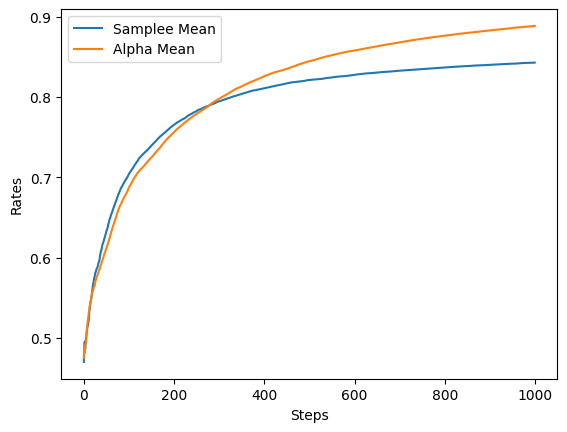

In [14]:
# 異なるエージェントで非定常なバンディット問題を解く
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000)の配列
all_rates2 = np.zeros((runs, steps)) # (200, 1000)の配列
alpha = 0.1 # 固定値のalpha

for run in range(runs):
    bandit = NonStatBandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action() # エージェントがアームを選択
        reward = bandit.play(action) # 選択したアームをプレイ
        agent.update(action, reward) # エージェントの行動価値を更新

        total_reward += reward
        rates.append(total_reward / (step + 1))
    all_rates[run] = rates

for run in range(runs):
    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action() # エージェントがアームを選択
        reward = bandit.play(action) # 選択したアームをプレイ
        agent.update(action, reward) # エージェントの行動価値を更新

        total_reward += reward
        rates.append(total_reward / (step + 1))
    all_rates2[run] = rates

avg_rates2 = np.average(all_rates2, axis=0) # 各ステップの平均を計算
# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates, label='Samplee Mean')
plt.plot(avg_rates2, label='Alpha Mean')
plt.legend()
plt.show()